In [1]:
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from datetime import datetime
import os
import random
from shutil import copyfile
assert torch.cuda.is_available(), "Missing CUDA"

1.21.2


In [2]:
torch.version.cuda

'10.2'

# Set Seeds for Reproducibility

In [3]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# Get Data

In [4]:
from datasets import LoadDataset, CustomOutput
from datasets.custom_output import image_tensor, bounding_boxes
from trafo.randomize.default_augmentation import default_augmentation_only_geometric

loaded_data = LoadDataset("_data/preprocessed256_new", image_dtype=float,
                          label_dtype=float)

dataset = CustomOutput(loaded_data, image_tensor, bounding_boxes, trafo=default_augmentation_only_geometric)

In [5]:
len(dataset)

6334

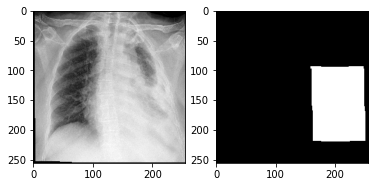

In [6]:
i_img = 42

fig, ax = plt.subplots(1,2)
plt.gray()
ax[0].imshow(dataset[i_img][0][0])
ax[1].imshow(dataset[i_img][1][0])
plt.show()

In [7]:
dataset[42][1].shape

torch.Size([1, 256, 256])

In [8]:
# get good split of dataset -> dividable by batch_size
batch_size = 32
l = len(dataset)
x = l // (batch_size *6 )
split = [x * batch_size * 5, l - x * batch_size * 5]
print(split)
train_set, val_set = torch.utils.data.random_split(dataset, split)

[5120, 1214]


In [9]:
dataloader_train = DataLoader(train_set, batch_size=batch_size,
                        shuffle=True, num_workers=0)#, pin_memory = True)
dataloader_val = DataLoader(val_set, batch_size=batch_size,
                        shuffle=True, num_workers=0, pin_memory = True)

# Get Network

In [10]:
from network.unet import Unet

# Get Training

In [11]:
from network.Model import OurModel
from network.losses import DiceLoss, BCEandDiceLoss

In [12]:
import torch.nn as nn
#criterion = nn.CrossEntropyLoss().cuda()
#criterion = DiceLoss() # use binary cross entropy loss!
criterion = BCEandDiceLoss()
#criterion = nn.BCELoss().cuda()
network = Unet()
path = f"./_trainings/{datetime.now().strftime('%d-%m_%H-%M')}"
if os.path.exists(path):
    print("PATH already exists")
else:
    print(f"Make {path} directory")
    os.makedirs(path)

Make ./_trainings/15-09_11-15 directory


In [13]:
Model = OurModel(name = "unet", network=network, criterion=criterion, path_dir=path, lr=0.001,
                 batch_size = batch_size, verbose = True, segmentation=True)
# save a json file which indicates what parameters are used for training
Model.save_configuration()

In [14]:
%%javascript
// copy the current version of the jupyter-notebook in the chosen directory (for documentation of the used code and
// setting...)
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [15]:
nb_name

'TrainingUnet.ipynb'

In [16]:
copyfile(os.path.join(os.getcwd(), nb_name), os.path.join(path, nb_name))

'./_trainings/15-09_11-15/TrainingUnet.ipynb'

In [17]:
Model.train(100, dataloader_train, validate = True,
            dataloader_val=dataloader_val, save_observables = True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

/home/students/patzig/aml37/.venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch1: training_loss = 1.3625369414687156
epoch1: training_dice = 0.31805026012734744


  0%|          | 0/38 [00:00<?, ?it/s]

epoch1: validation_loss = 1.285869350558833
epoch1: validation_dice = 0.3226826245847501


  0%|          | 0/160 [00:00<?, ?it/s]

epoch2: training_loss = 1.331439547240734
epoch2: training_dice = 0.3185194866033271


  0%|          | 0/38 [00:00<?, ?it/s]

epoch2: validation_loss = 1.2872234175079746
epoch2: validation_dice = 0.3232312904376733


  0%|          | 0/160 [00:00<?, ?it/s]

epoch3: training_loss = 1.2882655389606952
epoch3: training_dice = 0.322366932220757


  0%|          | 0/38 [00:00<?, ?it/s]

epoch3: validation_loss = 1.2849917223579006
epoch3: validation_dice = 0.3230123896347849


  0%|          | 0/160 [00:00<?, ?it/s]

epoch4: training_loss = 1.2816913791000843
epoch4: training_dice = 0.32236299170181154


  0%|          | 0/38 [00:00<?, ?it/s]

epoch4: validation_loss = 1.2821321424685026
epoch4: validation_dice = 0.3232307806611061


  0%|          | 0/160 [00:00<?, ?it/s]

epoch5: training_loss = 1.2782879397273064
epoch5: training_dice = 0.3223624171689153


  0%|          | 0/38 [00:00<?, ?it/s]

epoch5: validation_loss = 1.2813051688043695
epoch5: validation_dice = 0.3230112649892506


  0%|          | 0/160 [00:00<?, ?it/s]

epoch6: training_loss = 1.2759849362075328
epoch6: training_dice = 0.31868726103566586


  0%|          | 0/38 [00:00<?, ?it/s]

epoch6: validation_loss = 1.236704669500652
epoch6: validation_dice = 0.32306608440060364


  0%|          | 0/160 [00:00<?, ?it/s]

epoch7: training_loss = 1.2151451401412487
epoch7: training_dice = 0.3190445493906736


  0%|          | 0/38 [00:00<?, ?it/s]

epoch7: validation_loss = 1.1962486066316302
epoch7: validation_dice = 0.3229017340038952


  0%|          | 0/160 [00:00<?, ?it/s]

epoch8: training_loss = 1.1551022402942182
epoch8: training_dice = 0.2830188261345029


  0%|          | 0/38 [00:00<?, ?it/s]

epoch8: validation_loss = 1.1375356253824735
epoch8: validation_dice = 0.25462346327932256


  0%|          | 0/160 [00:00<?, ?it/s]

epoch9: training_loss = 1.1292745783925056
epoch9: training_dice = 0.31484865564852954


  0%|          | 0/38 [00:00<?, ?it/s]

epoch9: validation_loss = 1.1199376363503306
epoch9: validation_dice = 0.33720963879635457


  0%|          | 0/160 [00:00<?, ?it/s]

epoch10: training_loss = 1.105740812420845
epoch10: training_dice = 0.32600178867578505


  0%|          | 0/38 [00:00<?, ?it/s]

epoch10: validation_loss = 1.1006827072093361
epoch10: validation_dice = 0.30138332435959264


  0%|          | 0/160 [00:00<?, ?it/s]

epoch11: training_loss = 1.0762695927172898
epoch11: training_dice = 0.3401772671379149


  0%|          | 0/38 [00:00<?, ?it/s]

epoch11: validation_loss = 1.0624476341824782
epoch11: validation_dice = 0.33255058919128616


  0%|          | 0/160 [00:00<?, ?it/s]

epoch12: training_loss = 1.056580613553524
epoch12: training_dice = 0.3555363642051816


  0%|          | 0/38 [00:00<?, ?it/s]

epoch12: validation_loss = 1.0857706948330528
epoch12: validation_dice = 0.34126479727657216


  0%|          | 0/160 [00:00<?, ?it/s]

epoch13: training_loss = 1.0383746270090342
epoch13: training_dice = 0.37195714600384233


  0%|          | 0/38 [00:00<?, ?it/s]

epoch13: validation_loss = 1.0489056063325781
epoch13: validation_dice = 0.3827716323890184


  0%|          | 0/160 [00:00<?, ?it/s]

epoch14: training_loss = 1.0198790896683931
epoch14: training_dice = 0.3872426087036729


  0%|          | 0/38 [00:00<?, ?it/s]

epoch14: validation_loss = 0.9994512216040963
epoch14: validation_dice = 0.3913827185568057


  0%|          | 0/160 [00:00<?, ?it/s]

epoch15: training_loss = 1.0043618276715278
epoch15: training_dice = 0.3961637657135725


  0%|          | 0/38 [00:00<?, ?it/s]

epoch15: validation_loss = 1.02533914854652
epoch15: validation_dice = 0.4078209988380733


  0%|          | 0/160 [00:00<?, ?it/s]

epoch16: training_loss = 0.9924214888364077
epoch16: training_dice = 0.41042719762772323


  0%|          | 0/38 [00:00<?, ?it/s]

epoch16: validation_loss = 0.9871524493945273
epoch16: validation_dice = 0.4173469284647389


  0%|          | 0/160 [00:00<?, ?it/s]

epoch17: training_loss = 0.985560242459178
epoch17: training_dice = 0.4207130489870906


  0%|          | 0/38 [00:00<?, ?it/s]

epoch17: validation_loss = 0.9754116503815902
epoch17: validation_dice = 0.4238044235267137


  0%|          | 0/160 [00:00<?, ?it/s]

epoch18: training_loss = 0.979281074181199
epoch18: training_dice = 0.4216427180916071


  0%|          | 0/38 [00:00<?, ?it/s]

epoch18: validation_loss = 0.980965992337779
epoch18: validation_dice = 0.4492814368323276


  0%|          | 0/160 [00:00<?, ?it/s]

epoch19: training_loss = 0.9738206330686807
epoch19: training_dice = 0.4305835351347923


  0%|          | 0/38 [00:00<?, ?it/s]

epoch19: validation_loss = 0.9832165429466649
epoch19: validation_dice = 0.4370014847893464


  0%|          | 0/160 [00:00<?, ?it/s]

epoch20: training_loss = 0.9681638069450855
epoch20: training_dice = 0.43813994619995356


  0%|          | 0/38 [00:00<?, ?it/s]

epoch20: validation_loss = 0.9690152861570057
epoch20: validation_dice = 0.4473649530034316


  0%|          | 0/160 [00:00<?, ?it/s]

epoch21: training_loss = 0.9653377413749695
epoch21: training_dice = 0.44089228976517914


  0%|          | 0/38 [00:00<?, ?it/s]

epoch21: validation_loss = 0.9745769798755646
epoch21: validation_dice = 0.4036935975677089


  0%|          | 0/160 [00:00<?, ?it/s]

epoch22: training_loss = 0.95595567189157
epoch22: training_dice = 0.4389676883816719


  0%|          | 0/38 [00:00<?, ?it/s]

epoch22: validation_loss = 0.9644722515030911
epoch22: validation_dice = 0.43629986126171916


  0%|          | 0/160 [00:00<?, ?it/s]

epoch23: training_loss = 0.9520363092422486
epoch23: training_dice = 0.4498063035309315


  0%|          | 0/38 [00:00<?, ?it/s]

epoch23: validation_loss = 0.961410276199642
epoch23: validation_dice = 0.4363060209311937


  0%|          | 0/160 [00:00<?, ?it/s]

epoch24: training_loss = 0.9515362843871117
epoch24: training_dice = 0.4502144133672118


  0%|          | 0/38 [00:00<?, ?it/s]

epoch24: validation_loss = 0.9935506331293207
epoch24: validation_dice = 0.47912694043234777


  0%|          | 0/160 [00:00<?, ?it/s]

epoch25: training_loss = 0.9486071769148111
epoch25: training_dice = 0.44854327719658615


  0%|          | 0/38 [00:00<?, ?it/s]

epoch25: validation_loss = 0.9664622325646249
epoch25: validation_dice = 0.4328248061631855


  0%|          | 0/160 [00:00<?, ?it/s]

epoch26: training_loss = 0.9437422782182694
epoch26: training_dice = 0.4547747565433383


  0%|          | 0/38 [00:00<?, ?it/s]

epoch26: validation_loss = 0.9622382584371065
epoch26: validation_dice = 0.4202047774666234


  0%|          | 0/160 [00:00<?, ?it/s]

epoch27: training_loss = 0.9394796334207058
epoch27: training_dice = 0.4552000302821398


  0%|          | 0/38 [00:00<?, ?it/s]

epoch27: validation_loss = 0.9583631251987658
epoch27: validation_dice = 0.42942144760960027


  0%|          | 0/160 [00:00<?, ?it/s]

epoch28: training_loss = 0.9348885077983141
epoch28: training_dice = 0.4611662145704031


  0%|          | 0/38 [00:00<?, ?it/s]

epoch28: validation_loss = 0.9506291731407768
epoch28: validation_dice = 0.44765878429538325


  0%|          | 0/160 [00:00<?, ?it/s]

epoch29: training_loss = 0.9310408536344766
epoch29: training_dice = 0.4623304735869169


  0%|          | 0/38 [00:00<?, ?it/s]

epoch29: validation_loss = 0.9529803395271301
epoch29: validation_dice = 0.44408470627508667


  0%|          | 0/160 [00:00<?, ?it/s]

epoch30: training_loss = 0.9266670543700457
epoch30: training_dice = 0.46840226761996745


  0%|          | 0/38 [00:00<?, ?it/s]

epoch30: validation_loss = 0.9530845002124184
epoch30: validation_dice = 0.4520321527594014


  0%|          | 0/160 [00:00<?, ?it/s]

epoch31: training_loss = 0.9266603127121925
epoch31: training_dice = 0.4661646269261837


  0%|          | 0/38 [00:00<?, ?it/s]

epoch31: validation_loss = 0.9482073125086332
epoch31: validation_dice = 0.44675885611458827


  0%|          | 0/160 [00:00<?, ?it/s]

epoch32: training_loss = 0.9247230853885412
epoch32: training_dice = 0.46976901832968


  0%|          | 0/38 [00:00<?, ?it/s]

epoch32: validation_loss = 0.9544611086970881
epoch32: validation_dice = 0.44680891931056976


  0%|          | 0/160 [00:00<?, ?it/s]

epoch33: training_loss = 0.9213972944766283
epoch33: training_dice = 0.46961140241473914


  0%|          | 0/38 [00:00<?, ?it/s]

epoch33: validation_loss = 0.9501405028920424
epoch33: validation_dice = 0.45672473703560074


  0%|          | 0/160 [00:00<?, ?it/s]

epoch34: training_loss = 0.9223817434161902
epoch34: training_dice = 0.46974188070744277


  0%|          | 0/38 [00:00<?, ?it/s]

epoch34: validation_loss = 0.9531948597807633
epoch34: validation_dice = 0.4187726245114678


  0%|          | 0/160 [00:00<?, ?it/s]

epoch35: training_loss = 0.9189136773347855
epoch35: training_dice = 0.47657795809209347


  0%|          | 0/38 [00:00<?, ?it/s]

epoch35: validation_loss = 0.9515197088843897
epoch35: validation_dice = 0.4314291430147071


  0%|          | 0/160 [00:00<?, ?it/s]

epoch36: training_loss = 0.9153616178780795
epoch36: training_dice = 0.4739949595183134


  0%|          | 0/38 [00:00<?, ?it/s]

epoch36: validation_loss = 0.9662549197673798
epoch36: validation_dice = 0.46537173264905024


  0%|          | 0/160 [00:00<?, ?it/s]

epoch37: training_loss = 0.9114553399384022
epoch37: training_dice = 0.4699969807639718


  0%|          | 0/38 [00:00<?, ?it/s]

epoch37: validation_loss = 0.9488426729252464
epoch37: validation_dice = 0.44454589721403626


  0%|          | 0/160 [00:00<?, ?it/s]

epoch38: training_loss = 0.9093918401747942
epoch38: training_dice = 0.47855531368404625


  0%|          | 0/38 [00:00<?, ?it/s]

epoch38: validation_loss = 0.9500719763730702
epoch38: validation_dice = 0.42621686740925435


  0%|          | 0/160 [00:00<?, ?it/s]

epoch39: training_loss = 0.9066721454262734
epoch39: training_dice = 0.4760776374489069


  0%|          | 0/38 [00:00<?, ?it/s]

epoch39: validation_loss = 0.9492057138367703
epoch39: validation_dice = 0.4547972294845079


  0%|          | 0/160 [00:00<?, ?it/s]

epoch40: training_loss = 0.9028676148504019
epoch40: training_dice = 0.48287590220570564


  0%|          | 0/38 [00:00<?, ?it/s]

epoch40: validation_loss = 0.9533397586722123
epoch40: validation_dice = 0.4546665878672349


  0%|          | 0/160 [00:00<?, ?it/s]

epoch41: training_loss = 0.9018508560955525
epoch41: training_dice = 0.4923424473032355


  0%|          | 0/38 [00:00<?, ?it/s]

epoch41: validation_loss = 0.9486044080633866
epoch41: validation_dice = 0.4356721898442821


  0%|          | 0/160 [00:00<?, ?it/s]

epoch42: training_loss = 0.9013115290552378
epoch42: training_dice = 0.49239327702671287


  0%|          | 0/38 [00:00<?, ?it/s]

epoch42: validation_loss = 0.9456218528120142
epoch42: validation_dice = 0.4380970863919509


  0%|          | 0/160 [00:00<?, ?it/s]

epoch43: training_loss = 0.8974475853145123
epoch43: training_dice = 0.48987631741911175


  0%|          | 0/38 [00:00<?, ?it/s]

epoch43: validation_loss = 0.9436494817859248
epoch43: validation_dice = 0.46094849548841776


  0%|          | 0/160 [00:00<?, ?it/s]

epoch44: training_loss = 0.8946938369423151
epoch44: training_dice = 0.5002321453765035


  0%|          | 0/38 [00:00<?, ?it/s]

epoch44: validation_loss = 0.9501221211333024
epoch44: validation_dice = 0.45234098010941554


  0%|          | 0/160 [00:00<?, ?it/s]

epoch45: training_loss = 0.8949381750077009
epoch45: training_dice = 0.49244819954037666


  0%|          | 0/38 [00:00<?, ?it/s]

epoch45: validation_loss = 0.9504914691573695
epoch45: validation_dice = 0.446354982100035


  0%|          | 0/160 [00:00<?, ?it/s]

epoch46: training_loss = 0.8903933808207511
epoch46: training_dice = 0.49562681596726177


  0%|          | 0/38 [00:00<?, ?it/s]

epoch46: validation_loss = 0.9672880643292477
epoch46: validation_dice = 0.43514839912715714


  0%|          | 0/160 [00:00<?, ?it/s]

epoch47: training_loss = 0.8873665384948254
epoch47: training_dice = 0.4964798718690872


  0%|          | 0/38 [00:00<?, ?it/s]

epoch47: validation_loss = 0.9497271227209192
epoch47: validation_dice = 0.4727872908115387


  0%|          | 0/160 [00:00<?, ?it/s]

epoch48: training_loss = 0.8834742072969675
epoch48: training_dice = 0.5035412413999438


  0%|          | 0/38 [00:00<?, ?it/s]

epoch48: validation_loss = 0.9723575742621171
epoch48: validation_dice = 0.46961180395201635


  0%|          | 0/160 [00:00<?, ?it/s]

epoch49: training_loss = 0.8799187712371349
epoch49: training_dice = 0.5015327697619796


  0%|          | 0/38 [00:00<?, ?it/s]

epoch49: validation_loss = 0.9577185103767797
epoch49: validation_dice = 0.4433411383315137


  0%|          | 0/160 [00:00<?, ?it/s]

epoch50: training_loss = 0.8795647341758013
epoch50: training_dice = 0.4978065649047494


  0%|          | 0/38 [00:00<?, ?it/s]

epoch50: validation_loss = 0.9519664723622171
epoch50: validation_dice = 0.46007527959974187


  0%|          | 0/160 [00:00<?, ?it/s]

epoch51: training_loss = 0.8765486482530832
epoch51: training_dice = 0.5049216713756323


  0%|          | 0/38 [00:00<?, ?it/s]

epoch51: validation_loss = 0.949845303046076
epoch51: validation_dice = 0.4404231011867523


  0%|          | 0/160 [00:00<?, ?it/s]

epoch52: training_loss = 0.8719956554472447
epoch52: training_dice = 0.5128637859597802


  0%|          | 0/38 [00:00<?, ?it/s]

epoch52: validation_loss = 0.9538198019328871
epoch52: validation_dice = 0.43186267347712265


  0%|          | 0/160 [00:00<?, ?it/s]

epoch53: training_loss = 0.8768353708088398
epoch53: training_dice = 0.509005687944591


  0%|          | 0/38 [00:00<?, ?it/s]

epoch53: validation_loss = 0.9530811309814453
epoch53: validation_dice = 0.4522541157509151


  0%|          | 0/160 [00:00<?, ?it/s]

epoch54: training_loss = 0.8706117395311594
epoch54: training_dice = 0.5092702399939298


  0%|          | 0/38 [00:00<?, ?it/s]

epoch54: validation_loss = 0.9496727570107109
epoch54: validation_dice = 0.42512291434564087


  0%|          | 0/160 [00:00<?, ?it/s]

epoch55: training_loss = 0.8727328192442656
epoch55: training_dice = 0.503659395314753


  0%|          | 0/38 [00:00<?, ?it/s]

epoch55: validation_loss = 0.9616257501275915
epoch55: validation_dice = 0.4461321548411721


  0%|          | 0/160 [00:00<?, ?it/s]

epoch56: training_loss = 0.8625348746776581
epoch56: training_dice = 0.5194023629650474


  0%|          | 0/38 [00:00<?, ?it/s]

epoch56: validation_loss = 0.9792975014761874
epoch56: validation_dice = 0.4575652778148651


  0%|          | 0/160 [00:00<?, ?it/s]

epoch57: training_loss = 0.8621673438698053
epoch57: training_dice = 0.5202497623860836


  0%|          | 0/38 [00:00<?, ?it/s]

epoch57: validation_loss = 0.9609430965624357
epoch57: validation_dice = 0.41555239260196686


  0%|          | 0/160 [00:00<?, ?it/s]

epoch58: training_loss = 0.8607654072344303
epoch58: training_dice = 0.5260589784011245


  0%|          | 0/38 [00:00<?, ?it/s]

epoch58: validation_loss = 0.9606746152827614
epoch58: validation_dice = 0.4338368083301343


  0%|          | 0/160 [00:00<?, ?it/s]

epoch59: training_loss = 0.8662445861846209
epoch59: training_dice = 0.5229405522346496


  0%|          | 0/38 [00:00<?, ?it/s]

epoch59: validation_loss = 0.9589687115267703
epoch59: validation_dice = 0.44861700032886703


  0%|          | 0/160 [00:00<?, ?it/s]

epoch60: training_loss = 0.8706358395516872
epoch60: training_dice = 0.51824403796345


  0%|          | 0/38 [00:00<?, ?it/s]

epoch60: validation_loss = 1.0010767124201123
epoch60: validation_dice = 0.46436980680415507


  0%|          | 0/160 [00:00<?, ?it/s]

epoch61: training_loss = 0.8689877606928349
epoch61: training_dice = 0.5241483552381396


  0%|          | 0/38 [00:00<?, ?it/s]

epoch61: validation_loss = 1.129296020457619
epoch61: validation_dice = 0.4628918516008477


  0%|          | 0/160 [00:00<?, ?it/s]

epoch62: training_loss = 0.8664439707994461
epoch62: training_dice = 0.5254501916468144


  0%|          | 0/38 [00:00<?, ?it/s]

epoch62: validation_loss = 0.9615018571677961
epoch62: validation_dice = 0.4866609518465243


  0%|          | 0/160 [00:00<?, ?it/s]

epoch63: training_loss = 0.8713286988437176
epoch63: training_dice = 0.5250952178612351


  0%|          | 0/38 [00:00<?, ?it/s]

epoch63: validation_loss = 0.9941984022918501
epoch63: validation_dice = 0.47421074148855713


  0%|          | 0/160 [00:00<?, ?it/s]

epoch64: training_loss = 0.8660822477191686
epoch64: training_dice = 0.5395675571635365


  0%|          | 0/38 [00:00<?, ?it/s]

epoch64: validation_loss = 0.9799820921922985
epoch64: validation_dice = 0.43981307509698364


  0%|          | 0/160 [00:00<?, ?it/s]

epoch65: training_loss = 0.8794089589267969
epoch65: training_dice = 0.5233882257714868


  0%|          | 0/38 [00:00<?, ?it/s]

epoch65: validation_loss = 1.040362731406563
epoch65: validation_dice = 0.4923721693064037


  0%|          | 0/160 [00:00<?, ?it/s]

epoch66: training_loss = 0.8447876710444688
epoch66: training_dice = 0.5442040257155896


  0%|          | 0/38 [00:00<?, ?it/s]

epoch66: validation_loss = 1.0096730558495772
epoch66: validation_dice = 0.5005965491658763


  0%|          | 0/160 [00:00<?, ?it/s]

epoch67: training_loss = 0.8478433601558208
epoch67: training_dice = 0.5481993438675999


  0%|          | 0/38 [00:00<?, ?it/s]

epoch67: validation_loss = 1.0038245179151233
epoch67: validation_dice = 0.4749893797071357


  0%|          | 0/160 [00:00<?, ?it/s]

epoch68: training_loss = 0.850262763723731
epoch68: training_dice = 0.543134487606585


  0%|          | 0/38 [00:00<?, ?it/s]

epoch68: validation_loss = 0.9674557478804338
epoch68: validation_dice = 0.43772202024334356


  0%|          | 0/160 [00:00<?, ?it/s]

epoch69: training_loss = 0.8459163215011358
epoch69: training_dice = 0.5439494794234634


  0%|          | 0/38 [00:00<?, ?it/s]

epoch69: validation_loss = 0.9818575852795651
epoch69: validation_dice = 0.49507080802792


  0%|          | 0/160 [00:00<?, ?it/s]

epoch70: training_loss = 0.8294454030692577
epoch70: training_dice = 0.554821216315031


  0%|          | 0/38 [00:00<?, ?it/s]

epoch70: validation_loss = 1.0577308645373897
epoch70: validation_dice = 0.5112310428368417


  0%|          | 0/160 [00:00<?, ?it/s]

epoch71: training_loss = 0.8212025661021471
epoch71: training_dice = 0.5509349329397082


  0%|          | 0/38 [00:00<?, ?it/s]

epoch71: validation_loss = 0.9762105282984281
epoch71: validation_dice = 0.4955332890937203


  0%|          | 0/160 [00:00<?, ?it/s]

epoch72: training_loss = 0.8186951678246259
epoch72: training_dice = 0.5560090823099018


  0%|          | 0/38 [00:00<?, ?it/s]

epoch72: validation_loss = 0.9866736735168257
epoch72: validation_dice = 0.4883293972203606


  0%|          | 0/160 [00:00<?, ?it/s]

epoch73: training_loss = 0.8159405689686536
epoch73: training_dice = 0.5565281165763736


  0%|          | 0/38 [00:00<?, ?it/s]

epoch73: validation_loss = 0.967541123691358
epoch73: validation_dice = 0.47587719716523824


  0%|          | 0/160 [00:00<?, ?it/s]

epoch74: training_loss = 0.8176170140504837
epoch74: training_dice = 0.5634660445153713


  0%|          | 0/38 [00:00<?, ?it/s]

epoch74: validation_loss = 0.9671508214975658
epoch74: validation_dice = 0.4744761507762106


  0%|          | 0/160 [00:00<?, ?it/s]

epoch75: training_loss = 0.8175168462097645
epoch75: training_dice = 0.5577685931697488


  0%|          | 0/38 [00:00<?, ?it/s]

epoch75: validation_loss = 0.9703736760114369
epoch75: validation_dice = 0.48955394484494863


  0%|          | 0/160 [00:00<?, ?it/s]

epoch76: training_loss = 0.8317091763019562
epoch76: training_dice = 0.5505772557109594


  0%|          | 0/38 [00:00<?, ?it/s]

epoch76: validation_loss = 0.9437483172667654
epoch76: validation_dice = 0.497860481080256


  0%|          | 0/160 [00:00<?, ?it/s]

epoch77: training_loss = 0.8090233940631151
epoch77: training_dice = 0.5666268970817327


  0%|          | 0/38 [00:00<?, ?it/s]

epoch77: validation_loss = 1.0126566604564065
epoch77: validation_dice = 0.49580432239331695


  0%|          | 0/160 [00:00<?, ?it/s]

epoch78: training_loss = 0.8050701223313809
epoch78: training_dice = 0.5720359411090612


  0%|          | 0/38 [00:00<?, ?it/s]

epoch78: validation_loss = 0.9508927495856034
epoch78: validation_dice = 0.48178088351299886


  0%|          | 0/160 [00:00<?, ?it/s]

epoch79: training_loss = 0.8085891727358103
epoch79: training_dice = 0.5667086452245712


  0%|          | 0/38 [00:00<?, ?it/s]

epoch79: validation_loss = 0.9771846940642909
epoch79: validation_dice = 0.4506033690352189


  0%|          | 0/160 [00:00<?, ?it/s]

epoch80: training_loss = 0.8006978020071983
epoch80: training_dice = 0.5701224569231271


  0%|          | 0/38 [00:00<?, ?it/s]

epoch80: validation_loss = 0.9581043375165839
epoch80: validation_dice = 0.49486860319187764


  0%|          | 0/160 [00:00<?, ?it/s]

epoch81: training_loss = 0.8085473343729973
epoch81: training_dice = 0.5748491231352091


  0%|          | 0/38 [00:00<?, ?it/s]

epoch81: validation_loss = 0.9621383155647077
epoch81: validation_dice = 0.5033158322698191


  0%|          | 0/160 [00:00<?, ?it/s]

epoch82: training_loss = 0.81590740326792
epoch82: training_dice = 0.5659285822883249


  0%|          | 0/38 [00:00<?, ?it/s]

epoch82: validation_loss = 0.9678625825204348
epoch82: validation_dice = 0.4861352694661994


  0%|          | 0/160 [00:00<?, ?it/s]

epoch83: training_loss = 0.8008147485554218
epoch83: training_dice = 0.5685378547757864


  0%|          | 0/38 [00:00<?, ?it/s]

epoch83: validation_loss = 0.9625970674188513
epoch83: validation_dice = 0.4971464025346856


  0%|          | 0/160 [00:00<?, ?it/s]

epoch84: training_loss = 0.786916495487094
epoch84: training_dice = 0.5806856440380216


  0%|          | 0/38 [00:00<?, ?it/s]

epoch84: validation_loss = 0.9519589904107546
epoch84: validation_dice = 0.5065337576364216


  0%|          | 0/160 [00:00<?, ?it/s]

epoch85: training_loss = 0.7867919057607651
epoch85: training_dice = 0.5763606073334813


  0%|          | 0/38 [00:00<?, ?it/s]

epoch85: validation_loss = 0.9639110690669009
epoch85: validation_dice = 0.4846985277376677


  0%|          | 0/160 [00:00<?, ?it/s]

epoch86: training_loss = 0.7958741836249829
epoch86: training_dice = 0.5779399484395981


  0%|          | 0/38 [00:00<?, ?it/s]

epoch86: validation_loss = 0.9848658928745672
epoch86: validation_dice = 0.4809802849041788


  0%|          | 0/160 [00:00<?, ?it/s]

epoch87: training_loss = 0.796606894955039
epoch87: training_dice = 0.5685782536864281


  0%|          | 0/38 [00:00<?, ?it/s]

epoch87: validation_loss = 0.9897460655162209
epoch87: validation_dice = 0.4860449668608214


  0%|          | 0/160 [00:00<?, ?it/s]

epoch88: training_loss = 0.7902608312666416
epoch88: training_dice = 0.5827428257092834


  0%|          | 0/38 [00:00<?, ?it/s]

epoch88: validation_loss = 0.9639361187031394
epoch88: validation_dice = 0.5001289546489716


  0%|          | 0/160 [00:00<?, ?it/s]

epoch89: training_loss = 0.7862459700554609
epoch89: training_dice = 0.580917383171618


  0%|          | 0/38 [00:00<?, ?it/s]

epoch89: validation_loss = 1.0170753535471464
epoch89: validation_dice = 0.4903541301426135


  0%|          | 0/160 [00:00<?, ?it/s]

epoch90: training_loss = 0.7895236343145371
epoch90: training_dice = 0.5802424428984523


  0%|          | 0/38 [00:00<?, ?it/s]

epoch90: validation_loss = 1.016531334111565
epoch90: validation_dice = 0.5014308142034631


  0%|          | 0/160 [00:00<?, ?it/s]

epoch91: training_loss = 0.7986338593065738
epoch91: training_dice = 0.570958636328578


  0%|          | 0/38 [00:00<?, ?it/s]

epoch91: validation_loss = 0.9769330071775537
epoch91: validation_dice = 0.4808515255388461


  0%|          | 0/160 [00:00<?, ?it/s]

epoch92: training_loss = 0.7893067978322506
epoch92: training_dice = 0.5815749382600188


  0%|          | 0/38 [00:00<?, ?it/s]

epoch92: validation_loss = 0.9628982465518149
epoch92: validation_dice = 0.4890784895733783


  0%|          | 0/160 [00:00<?, ?it/s]

epoch93: training_loss = 0.8154523223638535
epoch93: training_dice = 0.5623248439282179


  0%|          | 0/38 [00:00<?, ?it/s]

epoch93: validation_loss = 1.0027300276254352
epoch93: validation_dice = 0.47927064252527135


  0%|          | 0/160 [00:00<?, ?it/s]

epoch94: training_loss = 0.7732697609812021
epoch94: training_dice = 0.5885079449042678


  0%|          | 0/38 [00:00<?, ?it/s]

epoch94: validation_loss = 0.9527913677064996
epoch94: validation_dice = 0.4835847067205529


  0%|          | 0/160 [00:00<?, ?it/s]

epoch95: training_loss = 0.778982100263238
epoch95: training_dice = 0.583321264758706


  0%|          | 0/38 [00:00<?, ?it/s]

epoch95: validation_loss = 0.9737845831795743
epoch95: validation_dice = 0.5000938106524316


  0%|          | 0/160 [00:00<?, ?it/s]

epoch96: training_loss = 0.7665034964680671
epoch96: training_dice = 0.5955956732854247


  0%|          | 0/38 [00:00<?, ?it/s]

epoch96: validation_loss = 0.9598293884804374
epoch96: validation_dice = 0.47099704726746205


  0%|          | 0/160 [00:00<?, ?it/s]

epoch97: training_loss = 0.7527085967361927
epoch97: training_dice = 0.5907078519463539


  0%|          | 0/38 [00:00<?, ?it/s]

epoch97: validation_loss = 0.9936925533570742
epoch97: validation_dice = 0.4610842035004967


  0%|          | 0/160 [00:00<?, ?it/s]

epoch98: training_loss = 0.7740163259208203
epoch98: training_dice = 0.5890868743881583


  0%|          | 0/38 [00:00<?, ?it/s]

epoch98: validation_loss = 0.9897010687150454
epoch98: validation_dice = 0.5109344164007589


  0%|          | 0/160 [00:00<?, ?it/s]

epoch99: training_loss = 0.7529402397572994
epoch99: training_dice = 0.5958000922575593


  0%|          | 0/38 [00:00<?, ?it/s]

epoch99: validation_loss = 1.0024332435507524
epoch99: validation_dice = 0.509097369093644


  0%|          | 0/160 [00:00<?, ?it/s]

epoch100: training_loss = 0.7761597767472267
epoch100: training_dice = 0.5820136513561011


  0%|          | 0/38 [00:00<?, ?it/s]

epoch100: validation_loss = 1.045072448881049
epoch100: validation_dice = 0.48899947420546885


In [ ]:
#Model.load_weights(f"/Unet_first_try_e50.ckpt")

In [ ]:
"""for x,y in dataloader_val:
    Model.network.eval()
    y_hat = Model.network(x.float().cuda())
    break

y_hat = y_hat.cpu()
y_hat = y_hat.detach().numpy()
y = y.numpy()
fig, ax = plt.subplots(len(y_hat),3, figsize=(10, 100))
for i in range(len(y_hat)):
    ax[i,0].imshow(y_hat[i])
    ax[i,1].imshow(np.round(y_hat[i]))
    ax[i,2].imshow(y[i])
"""